In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the Dataset

In [9]:
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
#Data Cleaning

In [13]:
data.shape

(918, 12)

In [15]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [17]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(0)

In [21]:
#Exploring the data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [27]:
#Explority Data Anlaysis

In [29]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


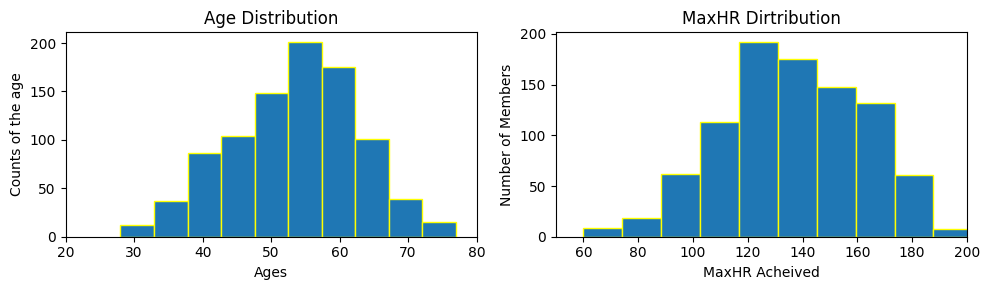

In [31]:
fig,axe=plt.subplots(1,2,figsize=(10,3))

axe[0].hist(data['Age'],bins=10,edgecolor='yellow')
axe[0].set_title('Age Distribution')
axe[0].set_xlabel('Ages')
axe[0].set_ylabel('Counts of the age')
axe[0].set_xlim(20,80)

axe[1].hist(data['MaxHR'],bins=10,edgecolor='yellow')
axe[1].set_xlabel('MaxHR Acheived')
axe[1].set_ylabel('Number of Members')
axe[1].set_title('MaxHR Dirtribution')
axe[1].set_xlim(50,200)

plt.tight_layout()
plt.show()

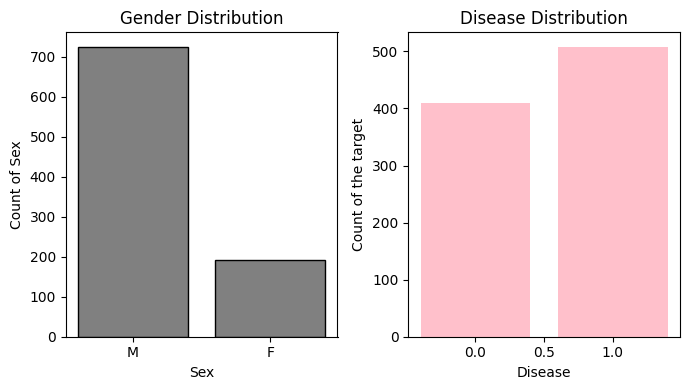

In [33]:
fig,axe=plt.subplots(1,2,figsize=(7,4))

#Gender Distribution
gender=data['Sex'].value_counts()
axe[0].bar(gender.index,gender.values,color='grey',edgecolor='black')
axe[0].set_xlabel('Sex')
axe[0].set_ylabel('Count of Sex')
axe[0].set_title('Gender Distribution')

#Heart Dieases Distribution
disease=data['HeartDisease'].value_counts()
axe[1].bar(disease.index,disease.values,color='pink')
axe[1].set_xlabel('Disease')
axe[1].set_ylabel('Count of the target')
axe[1].set_title('Disease Distribution')

plt.tight_layout()
plt.show()

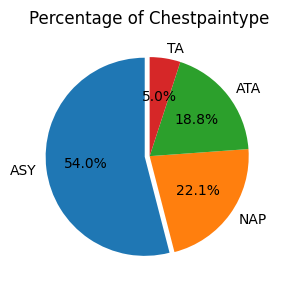

In [35]:
ch=data['ChestPainType'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(ch.values,labels=ch.index,autopct='%1.1f%%',explode=[0.05,0,0,0],startangle=90)
plt.title('Percentage of Chestpaintype')
plt.tight_layout()
plt.show()

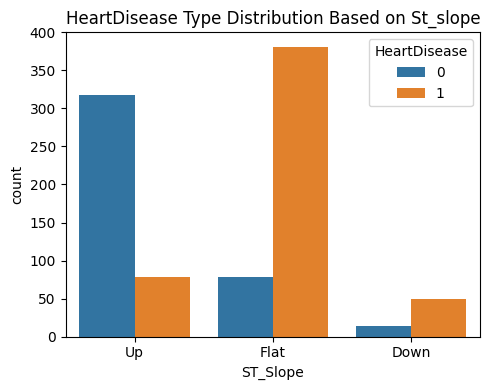

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x='ST_Slope',data=data,hue='HeartDisease')
plt.title('HeartDisease Type Distribution Based on St_slope')
plt.tight_layout()
plt.show()

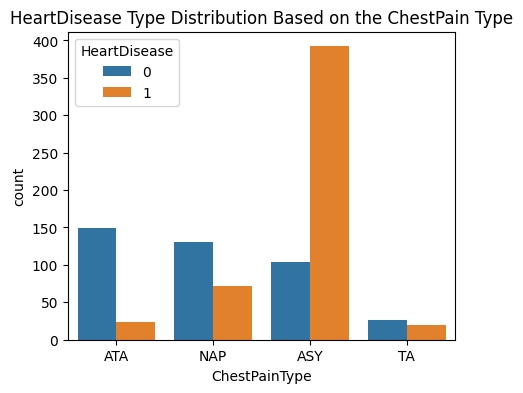

In [39]:
plt.figure(figsize=(5,4))
sns.countplot(x='ChestPainType',data=data,hue='HeartDisease')
plt.title('HeartDisease Type Distribution Based on the ChestPain Type')
plt.show()

In [41]:
#Label Encoding

In [43]:
df=data.copy()

In [45]:
df['Sex']=df['Sex'].map({'M':1,'F':0})
df['ChestPainType']=df['ChestPainType'].map({'ASY':1,'NAP':2,'ATA':3,'TA':4})
df['RestingECG']=df['RestingECG'].map({'Normal':0,'LVH':1,'ST':2})
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})
df['ST_Slope']=df['ST_Slope'].map({'Down':0,'Flat':1,'Up':2})

In [47]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,0,172,0,0.0,2,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,3,130,283,0,2,98,0,0.0,2,0


In [50]:
#Defining Input and targer varibles

In [52]:
input_data=df.iloc[:,:-1]
target_data=df.iloc[:,-1]

In [55]:
#Scaleing the input features

In [57]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [60]:
#Spliting the data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(input_data,target_data,test_size=0.25,random_state=42)

In [65]:
#Importing the Relevant models

In [67]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [69]:
ann=Sequential()

In [71]:
ann.add(Dense(4,activation='relu',input_dim=11))
ann.add(Dense(3,activation='relu'))
ann.add(Dense(2,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [73]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [93]:
ann.fit(x_train,y_train,batch_size=50,epochs=28,validation_data=(x_test,y_test))

Epoch 1/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8547 - loss: 0.3665 - val_accuracy: 0.8348 - val_loss: 0.4140
Epoch 2/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8547 - loss: 0.3650 - val_accuracy: 0.8391 - val_loss: 0.4140
Epoch 3/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8576 - loss: 0.3641 - val_accuracy: 0.8391 - val_loss: 0.4129
Epoch 4/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8590 - loss: 0.3624 - val_accuracy: 0.8391 - val_loss: 0.4119
Epoch 5/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8605 - loss: 0.3615 - val_accuracy: 0.8391 - val_loss: 0.4117
Epoch 6/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8619 - loss: 0.3603 - val_accuracy: 0.8348 - val_loss: 0.4105
Epoch 7/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8605 - loss: 0.3594 - val_accuracy: 0.8348 - val_loss: 0.4097
Epoch 8/28
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8619 - loss: 0.3585 - val_accuracy: 0.8348 - v

In [77]:
#Finding the accuracy

In [79]:
from sklearn.metrics import accuracy_score

In [81]:
#Finding the training accuracy

In [95]:
train_pred=ann.predict(x_train)
train_pd=[]

for i in train_pred:
    if i > 0.5:
        train_pd.append(1)
    else:
        train_pd.append(0)
accuracy_score(y_train,train_pd)*100

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


86.9186046511628

In [85]:
#Finding the test Accuracy

In [97]:
test_pred=ann.predict(x_test)
test_pd=[]

for i in test_pred:
    if i > 0.5:
        test_pd.append(1)
    else:
        test_pd.append(0)
accuracy_score(y_test,test_pd)*100

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


85.21739130434783

In [102]:
accuracy=ann.history.history['accuracy']
val_accuracy=ann.history.history['val_accuracy']

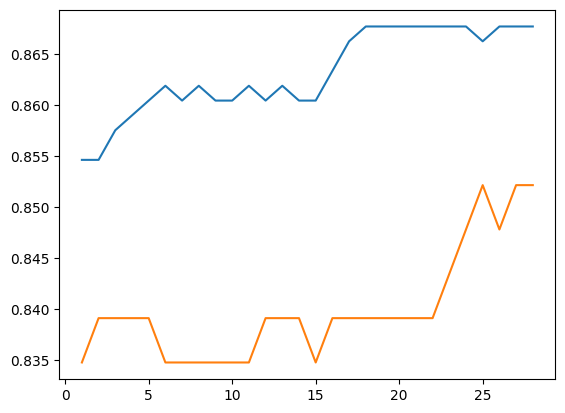

In [104]:
plt.plot([i for i in range(1,29)],accuracy)
plt.plot([i for i in range(1,29)],val_accuracy)
plt.show()

In [112]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,0,172,0,0.0,2,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,3,130,283,0,2,98,0,0.0,2,0
3,48,0,1,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,2,0


In [120]:
input=np.array([[37,1,3,130,283,0,2,98,0,0.0,2]])
scale=ss.transform(input)
pred=ann.predict(scale)
pd=[]

for i in pred:
    if i > 0.5:
        pd.append(1)
    else:
        pd.append(0)
pd

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[0]

In [123]:
import pickle
with open('Heart_Disease.pickle','wb') as f:
    pickle.dump(ann,f)

In [125]:
import json
columns={
    'data_columns': [col.lower() for col in input_data.columns]
}

with open('Heart_Disease_columns.json','w') as f:
    f.write(json.dumps(columns))